In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import pyplot as pp
%matplotlib inline

In [2]:
from utils import Frame
# 012345678
# occcohhhh
mda = Frame(np.load("data/malonaldehyde_300k.npz"))
mda_test = Frame(np.load("data/malonaldehyde_300k_test.npz"))

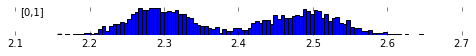

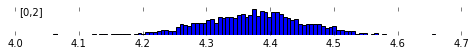

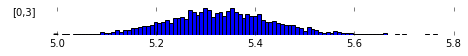

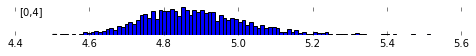

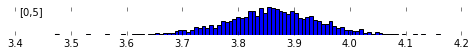

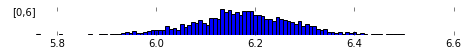

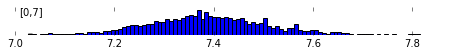

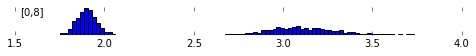

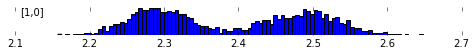

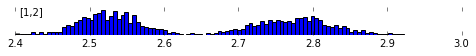

KeyboardInterrupt: 

In [3]:
from utils import ecdf, epdf
from plots import plot_text

data = mda
_,_,a = data["D"].shape
for i in range(9):
    for j in range(9):
        if i == j: continue
        d = data["D"][:,i,j].flatten()
        pp.figure(figsize=(8,0.5))
        pp.hist(d[d!=0], bins=100)
#         pp.plot(*epdf(d, steps=50), lw=1)
        pp.yticks([])
        plot_text("[{},{}]".format(i,j), loc="sw")
        ax = pp.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        pp.show()

In [69]:
print(np.vstack([d["R"].mean(axis=(0,1)) for d in [mda, mda_test]]).T)
print(np.vstack([d["R"].std(axis=(0,1)) for d in [mda, mda_test]]).T)

[[  9.99931533  10.54803702]
 [ 10.10890514  10.6838176 ]
 [ 10.00028373  10.54965535]]
[[ 2.50602584  2.47233162]
 [ 1.95302637  2.00135976]
 [ 0.19942233  0.18818415]]


In [68]:
print(np.vstack([d["D"].mean(axis=(0,1)) for d in [mda, mda_test]]).T)
print(np.vstack([d["D"].std(axis=(0,1)) for d in [mda, mda_test]]).T)

[[ 4.1000825   4.07006537]
 [ 3.49307268  3.47177276]
 [ 3.16416965  3.21211322]
 [ 3.49349415  3.47973493]
 [ 4.10289566  4.07200844]
 [ 4.72484989  4.71803219]
 [ 4.22278489  4.31069956]
 [ 4.72351964  4.73116278]
 [ 3.81694289  3.8498449 ]]
[[ 2.11163817  2.09865668]
 [ 1.84457469  1.80626416]
 [ 1.39783247  1.43160519]
 [ 1.84450141  1.80786061]
 [ 2.1118929   2.08765004]
 [ 2.45081305  2.42858179]
 [ 1.96287557  2.01458792]
 [ 2.45009332  2.43300685]
 [ 1.90578602  1.93496572]]


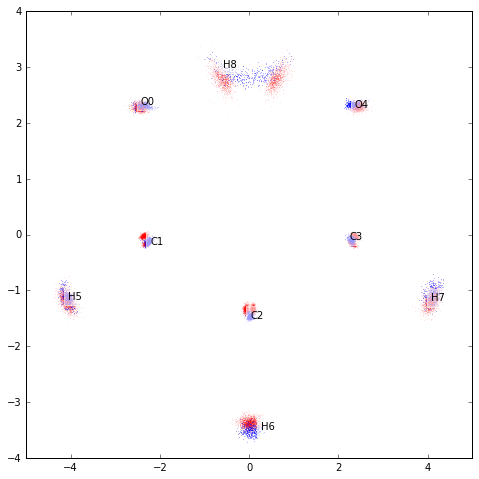

In [4]:
from sklearn.decomposition import PCA
est = PCA(n_components=2)
pp.figure(figsize=(8,8))

X = est.fit_transform(mda["R"].reshape(-1,3))
pp.plot(X[:,0], -X[:,1], "r,", alpha=0.1) # red training
X = est.fit_transform(mda_test["R"].reshape(-1,3))
pp.plot(X[:,0], -X[:,1], "b,", alpha=0.3) # blue test

labels = mda["A"][0]
X2 = X.reshape([-1,9,2])[0]
for i in range(X2.shape[0]):
    pp.annotate(labels[i]+str(i), xy=X2[i,:]*np.array([1,-1]), backgroundcolor=(1,1,1,0.6))

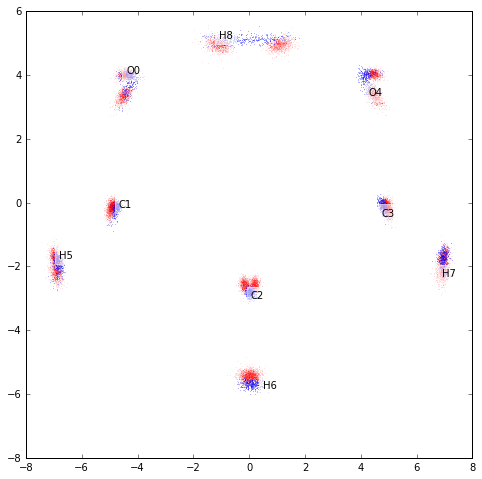

In [5]:
from sklearn.decomposition import PCA
pp.figure(figsize=(8,8))
est = PCA(n_components=2)

D = ((mda["R"][:,None,:,:] - mda["R"][:,:,None,:])**2).sum(-1)**0.5
X = est.fit_transform(D.reshape(-1,9))
pp.plot(X[:,0], -X[:,1], "r,", alpha=0.1) # red training

D = ((mda_test["R"][:,None,:,:] - mda_test["R"][:,:,None,:])**2).sum(-1)**0.5
X = est.fit_transform(D.reshape(-1,9))
pp.plot(X[:,0], -X[:,1], "b,", alpha=0.3) # blue test

labels = mda["A"][0]
X2 = X.reshape([-1,9,2])[0]
for i in range(X2.shape[0]):
    pp.annotate(labels[i]+str(i), xy=X2[i,:]*np.array([1,-1]), backgroundcolor=(1,1,1,0.6))

# Malonaldehyde from small trajectories

In [3]:
from utils import Frame
# 012345678
# occcohhhh
smda = Frame(np.load("data/malonaldehyde.npz"))
print(len(smda), smda.keys())

893238 dict_keys(['A', 'E', 'R', 'Z', 'F', 'D', 'N'])


In [6]:
print(" ".join(mda['A'][0]), "mda")
print(" ".join(smda['A'][0]), "smda")
print(" ".join(map(str, range(9))))

O C C C O H H H H mda
C C C O O H H H H smda
0 1 2 3 4 5 6 7 8


In [5]:
R = np.random.choice(np.arange(len(smda)), 20000)
R = smda["R"][R] # (n,a,3)
D = ((R[:,None,:,:] - R[:,:,None,:])**2).sum(-1)**0.5 # (n,a,a)

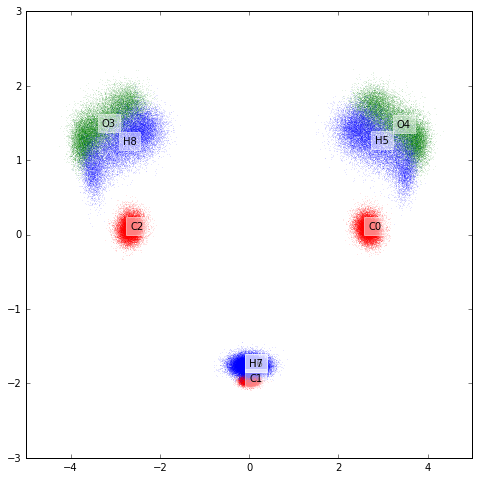

In [8]:
from sklearn.decomposition import PCA
pp.figure(figsize=(8,8))
est = PCA(n_components=2)

X = est.fit_transform(D.reshape([-1,D.shape[-1]])).reshape([D.shape[0], D.shape[1], 2])

labels = smda["A"][0]
fmt = {"C":"r,", "H":"b,", "O":"g,"}
for i,label in enumerate(labels):
    pp.plot(X[:,i,0], X[:,i,1], fmt[label], alpha=0.1)
    pp.annotate(label+str(i), xy=X.reshape([D.shape[0], D.shape[1], 2]).mean(0)[i,:], backgroundcolor=(1,1,1,0.5))

In [4]:
import itertools as it

def dists(R, c_atoms=None):
    d = ((R[None,:,:] - R[:,None,:])**2).sum(-1)**0.5 # (9,9)
    factor = d[np.ix_(c_atoms,c_atoms)].max() if c_atoms is not None else 1
    return d/factor

mda_0 = dists(mda_test["R"][0], [1,2,3])
T = []
I = []
for i in it.permutations(range(9)):
    d0 = mda_0
    d1 = dists(smda["R"][0][list(i)], [0,1,2])
    d = np.abs(d0 - d1).sum()
    T += [d]
    I += [i]
I,T = np.array(I), np.array(T)
I[np.argsort(T)]

array([[3, 2, 1, ..., 6, 4, 7],
       [5, 0, 1, ..., 6, 8, 7],
       [5, 7, 1, ..., 6, 8, 0],
       ...,
       [1, 7, 6, ..., 2, 0, 8],
       [1, 7, 6, ..., 5, 0, 4],
       [1, 7, 6, ..., 5, 0, 4]])

In [10]:
sortedT = np.argsort(T)
print(I[sortedT][0:3])
print(T[sortedT][0:3])

[[3 2 1 0 5 8 6 4 7]
 [5 0 1 2 3 4 6 8 7]
 [5 7 1 2 3 4 6 8 0]]
[ 9.01246    10.68295189 10.85645253]


In [88]:
%matplotlib inline
import time
pp.figure()
labels = smda["A"][0]
pp.plot(X[j,:,0], X[j,:,1], "k.")
pp.title("j = {}".format(j))
for i in range(X.shape[1]):
    pp.annotate(labels[i]+str(i), xy=X[j,i,:])
j += 100

NameError: name 'j' is not defined

In [5]:
R = np.random.choice(np.arange(len(smda)), 100000)
R = smda["R"][R] # (n,a,3)
D = ((R[:,None,:,:] - R[:,:,None,:])**2).sum(-1)**0.5 # (n,a,a)

In [17]:
R = smda["R"] # (n,a,3)
D = ((R[:,None,:,:] - R[:,:,None,:])**2).sum(-1)**0.5 # (n,a,a)

In [161]:
R = smda["R"] # (n,a,3)
D = ((R[:,None,:,:] - R[:,:,None,:])**2).sum(-1)**0.5 # (n,a,a)

In [7]:
labels = smda['A'][0]

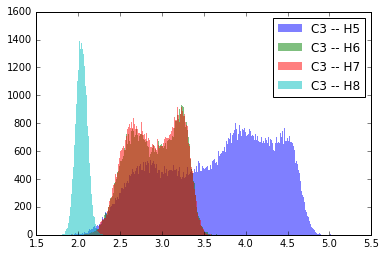

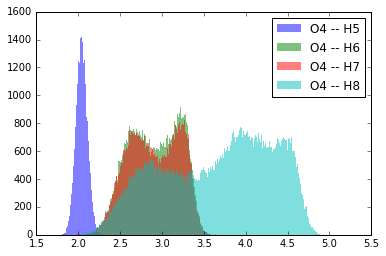

In [18]:
for i in [3,4]:
    pp.figure()
    for j in [5,6,7,8]:
        pp.hist(D[:,j,i], bins=500, alpha=0.5, lw=0, label='{} -- {}'.format(labels[i]+str(i), labels[j]+str(j)))
    pp.legend()
    None

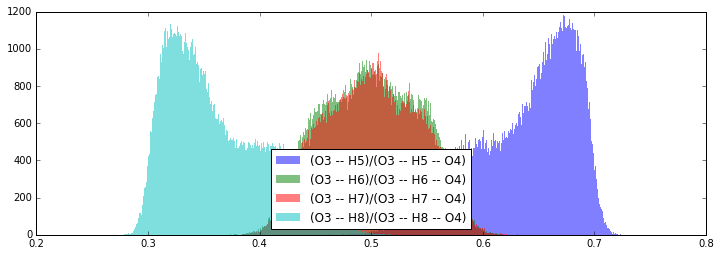

In [92]:
pp.figure(figsize=(12,4))
for h in [5,6,7,8]:
    pp.hist(D[:,3,h]/(D[:,3,h]+D[:,h,4]), bins=500, alpha=0.5, lw=0, label='(O3 -- H{})/(O3 -- H{} -- O4)'.format(h,h))
pp.legend(loc="lower center")

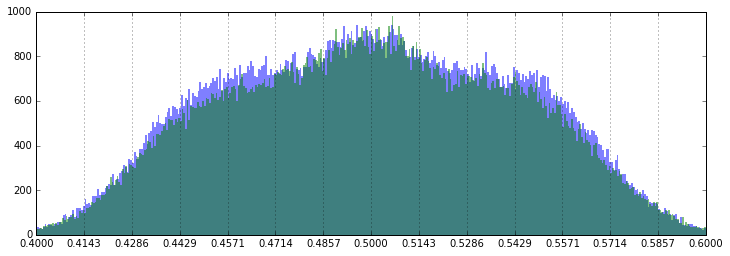

In [21]:
pp.figure(figsize=(12,4))
h = 6
pp.hist(D[:,3,h]/(D[:,3,h]+D[:,h,4]), bins=500, alpha=0.5, lw=0, label='(O3 -- H{})/(O3 -- H{} -- O4)'.format(h,h))
h = 7
pp.hist(D[:,3,h]/(D[:,3,h]+D[:,h,4]), bins=500, alpha=0.5, lw=0, label='(O3 -- H{})/(O3 -- H{} -- O4)'.format(h,h))
pp.xticks(np.linspace(0.4,0.6,15))
pp.grid(axis='x')
pp.xlim([0.4,0.6])
None

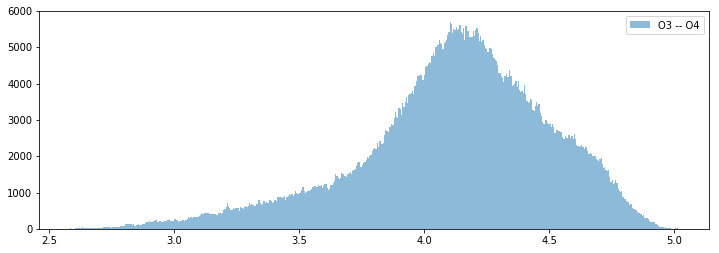

In [6]:
pp.figure(figsize=(12,4))
# pp.hist(D[:,3,6], bins=500, alpha=0.5, label='O3 -- H6')
# pp.hist(D[:,3,7], bins=500, alpha=0.5, label='O3 -- H7')
pp.hist((D[:,3,4]), bins=500, alpha=0.5, label='O3 -- O4')
pp.legend()

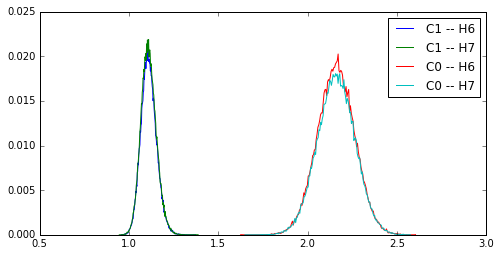

In [6]:
from utils import epdf
pp.figure(figsize=(8,4))
def dists(a, bs):
    labels = smda["A"][0]
    la = labels[a]
    for b in bs:
        lb = labels[b]
        epdf(D[:,a,b], bins=200, alpha=1.0, label='{}{} -- {}{}'.format(la, a, lb, b))
dists(1,[6,7])
dists(0,[6,7])
pp.legend()

In [7]:
# points where H's in O3 -- H6/H7 -- O4 are centered
# too much overlap between training and testsets
def within(X, lower, upper):
    lower, upper = np.percentile(X, (lower, upper))
    return (X >= lower) & (X <= upper)
# C = within(D[:,0,6], *q06) & within(D[:,0,7], *q07) & within(D[:,2,6], *q26) & within(D[:,2,7], *q27)
C = within(D[:,0,6], 0, 50) & within(D[:,2,7], 0, 50)
print(C.sum(), len(D))

23262 100000


In [31]:
C = within(D[:,1,6], 0, 50) & within(D[:,1,7], 50, 100)
print(C.sum())

49441


In [25]:
C = D[:,3,4] < 3.0
print(C.sum())
occo = C

1842


1821


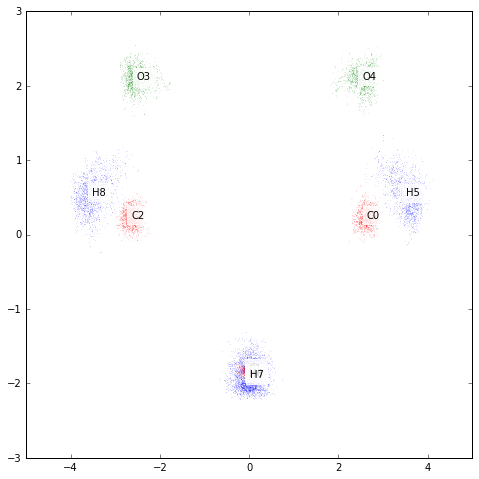

In [33]:
print(C.sum())

from sklearn.decomposition import PCA
pp.figure(figsize=(8,8))
est = PCA(n_components=2)

est.fit(D[C].reshape([-1,D.shape[-1]]))
X = est.transform(D.reshape([-1,D.shape[-1]])).reshape([-1, D.shape[1], 2])[C]

labels = smda["A"][0]
fmt = {"C":"r,", "H":"b,", "O":"g,"}
for i,label in enumerate(labels):
    pp.plot(X[:,i,0], X[:,i,1], fmt[label], alpha=0.1)
    pp.annotate(label+str(i), xy=X.reshape([-1, D.shape[1], 2]).mean(0)[i,:], backgroundcolor=(1,1,1,0.8))

In [9]:
%matplotlib notebook

In [8]:
# https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''
    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''
    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

# test set selection

<IPython.core.display.Javascript object>


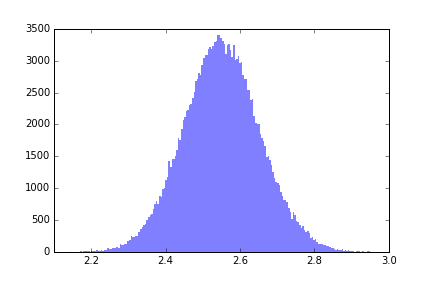

In [85]:
pp.figure()
pp.hist(D[:,3,6]/(D[:,3,6]+D[:]), bins=200, alpha=0.5, lw=0)
None

In [101]:
print(C.sum(), (~C).sum())

40000 160000


<IPython.core.display.Javascript object>


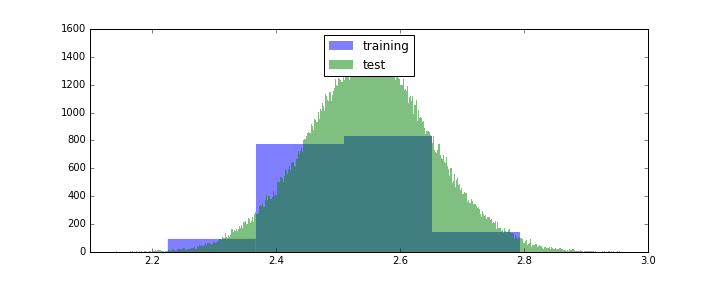

In [28]:
pp.figure(figsize=(10,4))
pp.hist(D[C,0,2], bins=int(500/len(C)*(C).sum()), alpha=0.5, lw=0, label='training')
pp.hist(D[~C,0,2], bins=int(500/len(C)*(~C).sum()), alpha=0.5, lw=0, label='test')
pp.legend(loc="upper center")

29724 70276


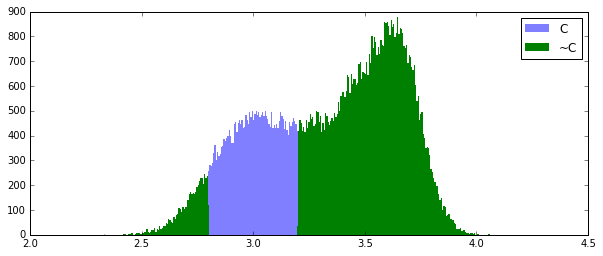

In [12]:
# dists = D[:,3,h]/(D[:,3,h]+D[:,h,4])
d = D[:,2,4]
C = (d < 3.2) & (d > 2.8)
print(C.sum(), (~C).sum())
pp.figure(figsize=(10,4))
pp.hist(d, bins=300, alpha=0.5, lw=0, label='C')
pp.hist(d[~C], bins=300, alpha=1, lw=0, label='~C')
pp.legend()
None

In [232]:
def distE(d, E, *args, bins=100, **kwargs):
    I = np.argsort(d)
    dI = d[I]
    L = len(d)
    X = np.linspace(dI[0], dI[-1], bins+1)
    S = (dI[:,None] <= X[None,:]).T
    Y = S.sum(axis=1)
    dY = []
    dS = [np.zeros_like(S[0], dtype=bool)]
    cS = S[0]
    for s in S:
        dS += [s & ~cS]
        cS = cS | s
        dY += [dS[-1].sum()]
    dY = np.array(dY[1:])
#     dY = (Y[1:] - Y[:-1])/L
    dx = (X[1] - X[0])/2 # uniform
    pp.subplot(211)
    pp.plot(X[:-1] + dx, dY, *args, **kwargs)
    meanE = E.mean()
    dE = np.array([E[s].mean() - meanE for s in dS[2:]])
    dEstd = np.array([(E[s] - meanE).std() for s in dS[2:]])
    pp.subplot(212)
    pp.plot(X[:-1] + dx, dE)
    pp.fill_between(X[:-1] + dx, dE-dEstd, dE+dEstd, color='blue', alpha=0.2)

In [228]:
import itertools as it
iterator = it.combinations(range(9), 2)

<IPython.core.display.Javascript object>


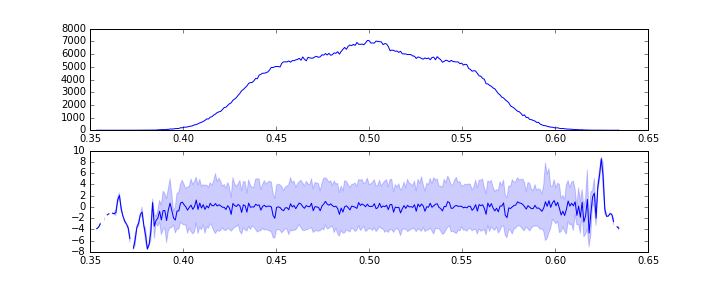

/home/robert/GPU22/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [269]:
pp.figure(figsize=(10,4))
distE(D[:,3,6]/(D[:,3,6]+D[:,6,4]), smda['E'], bins=300)

<IPython.core.display.Javascript object>


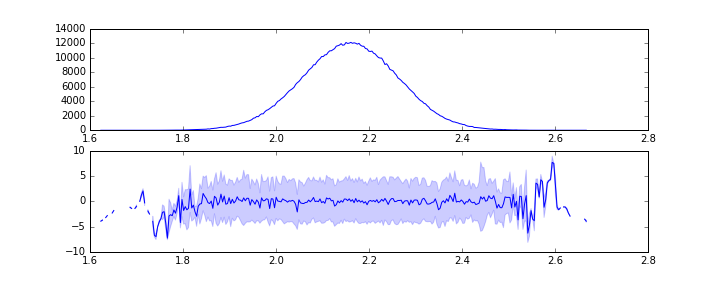

/home/robert/GPU22/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/robert/GPU22/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


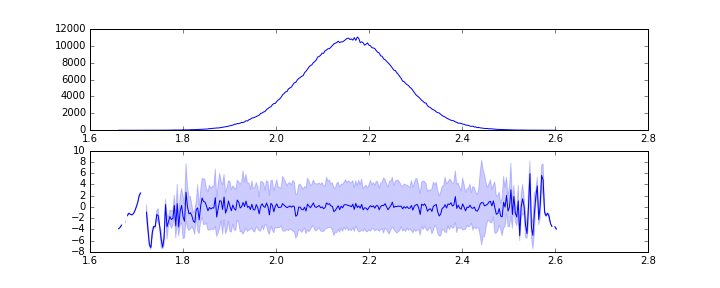

In [318]:
pp.figure(figsize=(10,4))
distE(D[:,0,6], smda['E'], bins=300)
pp.figure(figsize=(10,4))
distE(D[:,2,6], smda['E'], bins=300)

## save prepared data

In [329]:
from utils import Frame
# 012345678
# occcohhhh
smda = Frame(np.load("data/malonaldehyde.npz"))
benzene = Frame(np.load("data/benzene.npz"))
print(len(smda), smda.keys())
print(len(benzene), benzene.keys())

893238 dict_keys(['A', 'E', 'R', 'Z', 'F', 'D', 'N'])
527984 dict_keys(['A', 'N', 'R', 'Z', 'F', 'D', 'E'])


In [299]:
# seperate by relative distance
d = D[:,3,6]/(D[:,3,6]+D[:,6,4])
C = (d > 0.49) & (d < 0.51)
print(C.sum(), (~C).sum())

146261 746977


In [312]:
# seperate by minimum OHO distance
q = 33
q3 = np.percentile(D[:,3,6], q)
q4 = np.percentile(D[:,4,6], q)
print(q3,q4)
C = (D[:,3,6] < q3) & (D[:,4,6] < q4)
print(C.sum(), (~C).sum())

2.740153329924779 2.7374508563057702
55410 837828


In [324]:
# seperate by minimum CHC distance
q = 20
q0 = np.percentile(D[:,0,6], q)
q2 = np.percentile(D[:,2,6], q)
print(q0,q2)
C = (D[:,0,6] < q0) & (D[:,2,6] < q2)
print(C.sum(), (~C).sum())

2.0720028097993968 2.071529657176667
33747 859491


In [273]:
np.load('trained_models/benzene/tr.npz').keys()

['T', 'index', 'Z', 'R', 'E']

In [274]:
from data_loader import split_sets

In [325]:
# sample tr, va, te sets from ~C
smda['index'] = np.arange(len(smda))
smda['T'] = smda['E']
tr, va, de, te = split_sets(smda["T Z R E index".split()][~C], [50000, 10000, 10000, -1], start=10000, shuffle=True)
tr.keys()

[50000, 10000, 10000, 779491]
You really shouldn't use shuffle unless you're certain your points cover all possible configurations. it leaks information into the validation and testsets. The resulting model overfits to your dataset.


dict_keys(['index', 'R', 'Z', 'T', 'E'])

In [326]:
for st in [tr, va, de, te]:
    print(st.keys())

dict_keys(['index', 'R', 'Z', 'T', 'E'])
dict_keys(['index', 'R', 'Z', 'T', 'E'])
dict_keys(['index', 'R', 'Z', 'T', 'E'])
dict_keys(['index', 'R', 'Z', 'T', 'E'])


In [327]:
trms = Frame((k, [tr[k].mean(axis=0), tr[k].std(axis=0)]) for k in tr.keys() if k != 'index')

In [328]:
# save everything to disk
import os
path = os.path.join("trained_models","smda3")
os.makedirs(path, exist_ok=False)
np.savez(os.path.join(path, "tr.npz"), **tr)
np.savez(os.path.join(path, "va.npz"), **va)
np.savez(os.path.join(path, "de.npz"), **de)
np.savez(os.path.join(path, "te.npz"), **te)
np.savez(os.path.join(path, "tr_mean_std.npz"), **trms)
np.savez(os.path.join(path, "special.npz"), **smda[C]["T Z R E index".split()])

---
---

In [331]:
# sample tr, va, te sets from ~C
benzene['index'] = np.arange(len(benzene))
benzene['T'] = benzene['E']
tr, va, de, te = split_sets(benzene["T Z R E index".split()], [50000, 10000, 10000, -1], start=10000, shuffle=True)
tr.keys()

[50000, 10000, 10000, 447984]
You really shouldn't use shuffle unless you're certain your points cover all possible configurations. it leaks information into the validation and testsets. The resulting model overfits to your dataset.


dict_keys(['index', 'R', 'Z', 'T', 'E'])

In [332]:
for st in [tr, va, de, te]:
    print(st.keys())

dict_keys(['index', 'R', 'Z', 'T', 'E'])
dict_keys(['index', 'R', 'Z', 'T', 'E'])
dict_keys(['index', 'R', 'Z', 'T', 'E'])
dict_keys(['index', 'R', 'Z', 'T', 'E'])


In [333]:
trms = Frame((k, [tr[k].mean(axis=0), tr[k].std(axis=0)]) for k in tr.keys() if k != 'index')

In [334]:
# save everything to disk
import os
path = os.path.join("trained_models","benzene-k")
os.makedirs(path, exist_ok=False)
np.savez(os.path.join(path, "tr.npz"), **tr)
np.savez(os.path.join(path, "va.npz"), **va)
np.savez(os.path.join(path, "de.npz"), **de)
np.savez(os.path.join(path, "te.npz"), **te)
np.savez(os.path.join(path, "tr_mean_std.npz"), **trms)

---
---

In [49]:
for o in [3,4]:
    for h in [6,7]:
        print(D[:,o,h].min(), D[:,o,h].max(), o, h)
q = np.percentile(D[:,3,6], 0.01)
C = D[:,3,6] < q
print(C.sum(), (~C).sum())

1.8904543241321647 3.6588986242071537 3 6
1.8929305383072037 3.6787881157485818 3 7
1.8986622950817242 3.6824381321188544 4 6
1.9880669914877116 3.636361210819684 4 7
90 893148


4 893234


<IPython.core.display.Javascript object>


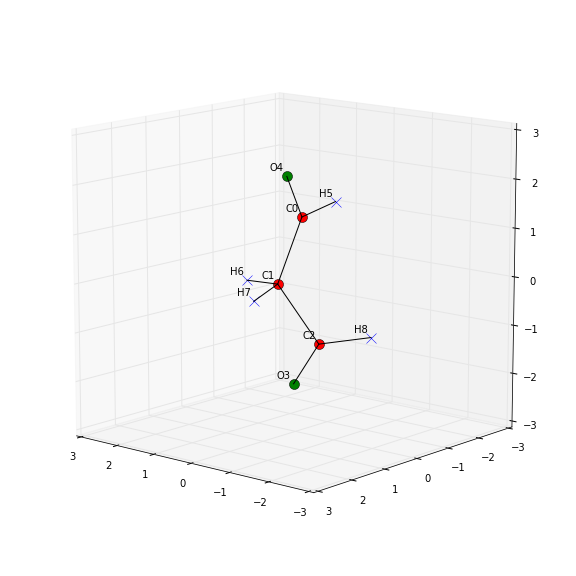

In [335]:
h = 6
d = 0
eps = 2.3
mean = 0
C = (d > mean-eps) & (d < mean + eps)
C = (D[:,3,h] < eps) & (D[:,4,h] < eps)
print(C.sum(), (~C).sum())

if C.sum() < 20:
    plot(R[C][-1][None,...])

<IPython.core.display.Javascript object>


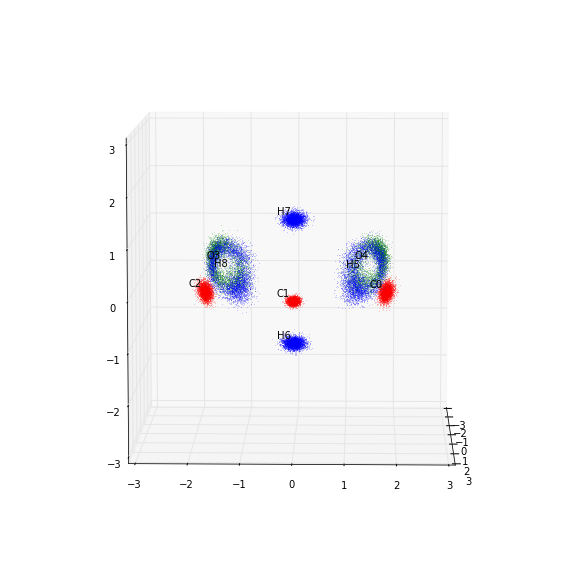

<IPython.core.display.Javascript object>


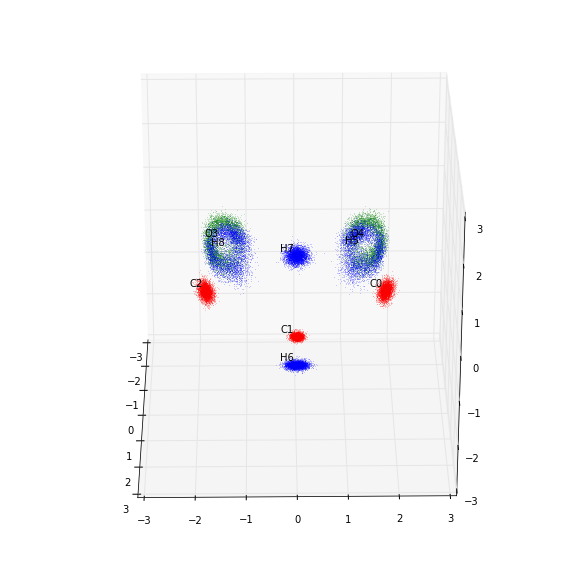

In [281]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

est = PCA(n_components=3)
est.fit(D[C].reshape(-1,D.shape[-1]))
# atoms = [0,1,2,6,7]
atoms = [0,1,2,6,7]
est.fit(D[C][:,:,atoms].reshape(-1,len(atoms)))
X = est.transform(D[:,:,atoms].reshape(-1,len(atoms))).reshape(-1, D.shape[1], 3)

def plot(X):
    fmt, alpha, ms = {"C":"r,", "H":"b,", "O":"g,"}, 0.2, 1
    if len(X) == 1:
        fmt, alpha, ms = {"C":"ro", "H":"bx", "O":"go"}, 1.0, 10
    if len(X) > 5000:
        X = X[np.random.choice(np.arange(len(X)), size=5000, replace=False)]
    labelX = X.mean(0)
        
    fig = pp.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    for i,label in enumerate(smda["A"][0]):
        pp.plot(X[:,i,0], X[:,i,1], X[:,i,2], fmt[label], alpha=alpha, markersize=ms)
        annotate3D(ax, label+str(i), xyz=labelX[i], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')
    
    # connect atoms by lines
    # only works for malonaldehyde from small molecular trajectories dataset
    if len(X) == 1:
        lines = [X[0,l] for l in [[0,1],[1,2],[2,8],[2,3],[0,5],[0,4],[1,6],[1,7]]]
        for line in lines:
            pp.plot(line[:,0], line[:,1], line[:,2], "k-", lw=1)
    
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    ax.set_zlim([-3,3])
    pp.gca().view_init(elev=60, azim=0)
    pp.tight_layout()

plot(X[C])
plot(X[~C])

In [89]:
# points where H's in O3 -- H6/H7 -- O4 are centered
# too much overlap between training and testsets
a = 6
OH6O = D[:,3,a]/(D[:,3,a]+D[:,a,4])
a = 7
OH7O = D[:,3,a]/(D[:,3,a]+D[:,a,4])
eps = 0.01
C = ((OH6O > 0.5-eps) & (OH6O < 0.5+eps)) | ((OH7O > 0.5-eps) & (OH7O < 0.5+eps))
# C = (OHO < 0.5)
print(C.sum(), (~C).sum())

60616 139384


In [61]:
est2d = PCA(n_components=2)
est2d.fit(D[occo].reshape([-1, D.shape[-1]]))
X = est2d.transform(D.reshape([-1,D.shape[-1]])).reshape([-1, D.shape[1], 2])
eps = 0.1
C = ((X[:,6,0] > -eps) & (X[:,6,0] < eps)) | ((X[:,7,0] > -eps) & (X[:,7,0] < eps))
print(C.sum(), C.shape)

537530 (893238,)


In [66]:
print(X[:,6,:].mean(0))
print(X[:,7,:].mean(0))

[-0.00731884 -1.79528088  0.13851917]
[-0.00648357 -1.80130335  0.18028204]


In [ ]:
# atoms = np.array([1,3,4,6,7])
atoms = np.arange(9)
X = est.transform(D.reshape([-1,D.shape[-1]])).reshape([-1, D.shape[1], 3])[C][:,atoms,:]
X = X.mean(0, keepdims=True)
plot(X)

In [ ]:
C = ~C
print(C.sum())

In [ ]:
# atoms = np.array([1,3,4,6,7])
atoms = np.arange(9)
X = est.transform(D.reshape([-1,D.shape[-1]])).reshape([-1, D.shape[1], 3])[C][:,atoms,:]
X = X.mean(0, keepdims=True)
plot(X)

In [11]:
for i in range(100): print()

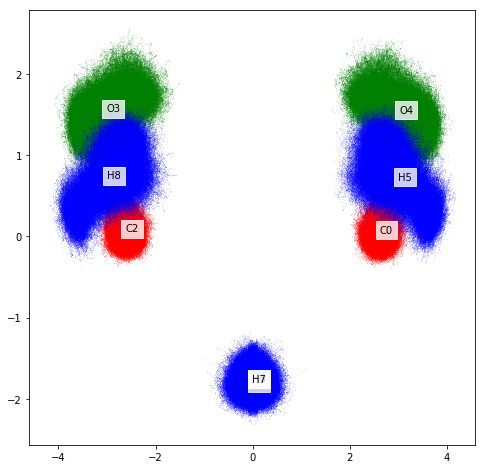

In [117]:
pp.figure(figsize=(8,8))
# atoms = np.array([1,3,4,6,7])
atoms = np.arange(9)
X = est.transform(D.reshape([-1,D.shape[-1]])).reshape([-1, D.shape[1], 2])[C][:,atoms,:]

labels = smda["A"][0]
fmt = {"C":"r,", "H":"b,", "O":"g,"}
for i,label in enumerate(labels):
    if i not in atoms: continue
    l = np.argwhere(atoms == i)[0,0]
    pp.plot(X[:,l,0], X[:,l,1], fmt[label], alpha=0.1)
    pp.annotate(label+str(i), xy=X.reshape([-1, len(atoms), 2]).mean(0)[l,:], backgroundcolor=(1,1,1,0.8))